# Regression Analysis

#### The aim here is to analyze the rtelationship between Teaching and Research Environment. Previously, we observed a nice correlation between these two characteristics

### 1. Importing libraries and data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
path = r'C:/Users/skhra/DataAnalytics/THE_Rating'

In [4]:
# Importing cleaned data
df = pd.read_csv(os.path.join(path, '02-Data', 'PreparedData', 'THE_prepared.csv'))

### 2. Data check

In [5]:
df.columns

Index(['Rank', 'Name', 'Country', 'Student Population',
       'Students to Staff Ratio', 'International Students',
       'Female to Male Ratio', 'Overall Score', 'Teaching',
       'Research Environment', 'Research Quality', 'Industry Impact',
       'International Outlook', 'Year'],
      dtype='object')

In [6]:
df.head(5)

,Rank,Name,Country,Student Population,Students to Staff Ratio,International Students,Female to Male Ratio,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook,Year
0,1.0,California Institute of Technology,United States,2243.0,6.9,26%,33 : 67,95.2,95.6,97.6,99.8,97.8,64.0,2016
1,2.0,University of Oxford,United Kingdom,19920.0,11.6,34%,46:54:00,94.2,86.5,98.9,98.8,73.1,94.4,2016
2,3.0,Stanford University,United States,15596.0,7.8,22%,42:58:00,93.9,92.5,96.2,99.9,63.3,76.3,2016
3,4.0,University of Cambridge,United Kingdom,18810.0,11.8,34%,46:54:00,92.8,88.2,96.7,97.0,55.0,91.5,2016
4,5.0,Massachusetts Institute of Technology,United States,11074.0,9.0,33%,37 : 63,92.0,89.4,88.6,99.7,95.4,84.0,2016


In [7]:
df.shape

(14522, 14)

#### Making a subset for further analysis

In [8]:
# Dropping unnecessary columns

df = df.drop(columns=['International Students','Female to Male Ratio', 'Year'])

In [9]:
df.head(5)

,Rank,Name,Country,Student Population,Students to Staff Ratio,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook
0,1.0,California Institute of Technology,United States,2243.0,6.9,95.2,95.6,97.6,99.8,97.8,64.0
1,2.0,University of Oxford,United Kingdom,19920.0,11.6,94.2,86.5,98.9,98.8,73.1,94.4
2,3.0,Stanford University,United States,15596.0,7.8,93.9,92.5,96.2,99.9,63.3,76.3
3,4.0,University of Cambridge,United Kingdom,18810.0,11.8,92.8,88.2,96.7,97.0,55.0,91.5
4,5.0,Massachusetts Institute of Technology,United States,11074.0,9.0,92.0,89.4,88.6,99.7,95.4,84.0


### 3. Data preparation for regression analysis 

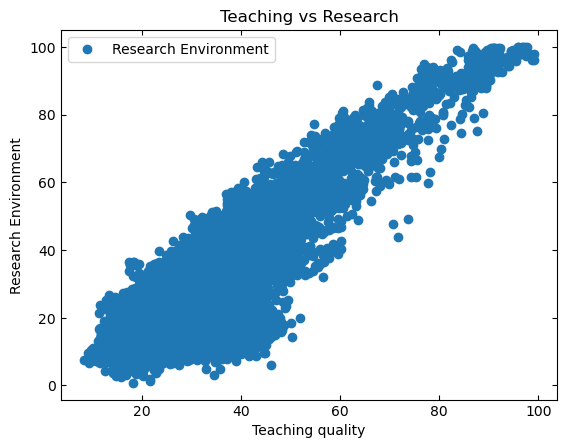

In [10]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Teaching', y='Research Environment',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Teaching vs Research')  
plt.xlabel('Teaching quality')  
plt.ylabel('Research Environment')  
plt.tick_params(direction='in', top=True, right=True)
plt.show()

In [11]:
# Reshape the variables into NumPy arrays 

X = df['Teaching'].values.reshape(-1,1)
y = df['Research Environment'].values.reshape(-1,1)

In [12]:
X

array([[95.6],
       [86.5],
       [92.5],
       ...,
       [12.4],
       [15.2],
       [12.5]])

In [13]:
y

array([[97.6],
       [98.9],
       [96.2],
       ...,
       [ 7.6],
       [ 9.2],
       [ 9.2]])

In [14]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [15]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [16]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [17]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

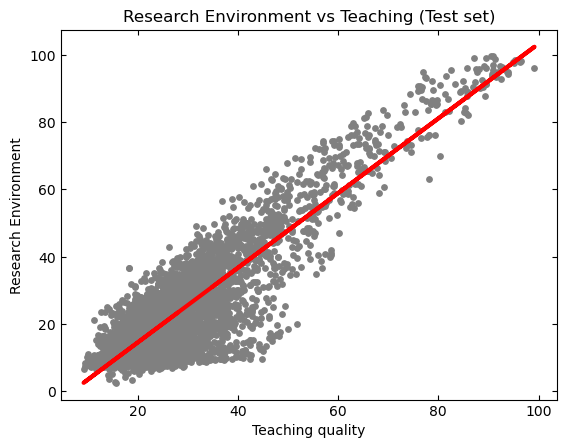

In [18]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Research Environment vs Teaching (Test set)')
plot_test.xlabel('Teaching quality')
plot_test.ylabel('Research Environment')
plt.tick_params(direction='in', top=True, right=True)
plot_test.show()

In [19]:
# Create statistics summary

rmse = mean_squared_error(y_test, y_predicted) #  mean squared error
r2 = r2_score(y_test, y_predicted) # R2 score. 

In [20]:
# Print statistics summary

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.10925751]]
Mean squared error:  62.993661898865994
R2 score:  0.7897682084885087


In [23]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,8.0,23.278820
1,14.7,15.070315
2,29.3,21.393083
3,27.6,33.040287
4,12.3,13.739206
5,15.1,23.167895
6,12.3,16.623275
7,8.1,9.745879
8,25.6,19.729196
9,10.2,9.634953


#### There are discrepancies between actual and predicted values. But overall linear regression does a good job. No other functional form is required. There is a scattering of datapoints, but this comes from the fact that Research Environment is not a function of a single variable Research. Other aspects may play some role. Taking this into account, the linear regression is appropriate. I do not think it works better on a training set, which will be verified below.   

##### Compare how the regression fits the training set

In [24]:
# Predict.

y_predicted_train = regression.predict(X_train) 

In [25]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [26]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.10925751]]
Mean squared error:  64.33328116071162
R2 score:  0.7888586409285859


#### Interestingly, mean squared error is even larger for the training dataset!

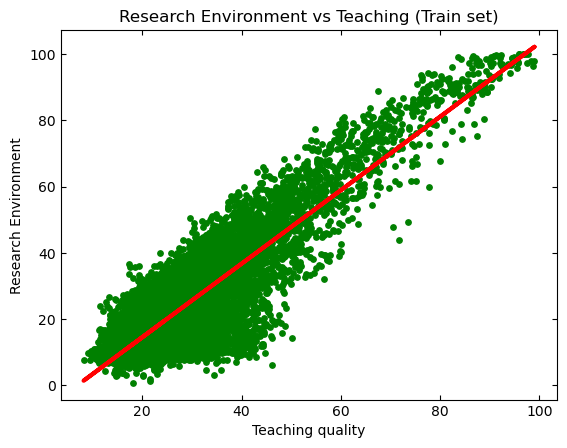

In [29]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Research Environment vs Teaching (Train set)')
plot_test.xlabel('Teaching quality')
plot_test.ylabel('Research Environment')
plt.tick_params(direction='in', top=True, right=True)
plot_test.show()

#### The performance on the train set is very similar to that on the test set